# Customer Retention Analysis

# Step 1: Import Required Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plot style
sns.set(style='whitegrid')

In [5]:
df = pd.read_csv("C:/Users/HP/Downloads/customer_retention_analysis.csv")

In [6]:
# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   CustomerID  Age  Gender  AccountTenure  TransactionFrequency  \
0           1   56   Other             11                    13   
1           2   69    Male             13                    14   
2           3   46  Female             26                    20   
3           4   32   Other             25                    18   
4           5   60    Male             19                    29   

   TotalServicesUsed  FeedbackScore  AverageBalance IsActiveMember  \
0                  4              9        40917.57            Yes   
1                  4              9        83530.76            Yes   
2                  1              8        81652.43            Yes   
3                  3             10        61571.27             No   
4                  2             10        37972.34             No   

   NumOfProducts HasCrCard  EstimatedSalary Geography Churn  
0              1        No        142852.22   Germany    No  
1              2       

# Step 2: Load Dataset and Basic Inspection

2.1. Checking the Structure of the Data

In [7]:
# Check the structure of the data
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   AccountTenure         1000 non-null   int64  
 4   TransactionFrequency  1000 non-null   int64  
 5   TotalServicesUsed     1000 non-null   int64  
 6   FeedbackScore         1000 non-null   int64  
 7   AverageBalance        1000 non-null   float64
 8   IsActiveMember        1000 non-null   object 
 9   NumOfProducts         1000 non-null   int64  
 10  HasCrCard             1000 non-null   object 
 11  EstimatedSalary       1000 non-null   float64
 12  Geography             1000 non-null   object 
 13  Churn                 1000 non-null   object 
dtypes: float64(2), int64(7), object(5)
memory usage: 10

In [8]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
CustomerID              0
Age                     0
Gender                  0
AccountTenure           0
TransactionFrequency    0
TotalServicesUsed       0
FeedbackScore           0
AverageBalance          0
IsActiveMember          0
NumOfProducts           0
HasCrCard               0
EstimatedSalary         0
Geography               0
Churn                   0
dtype: int64


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        CustomerID          Age  AccountTenure  TransactionFrequency  \
count  1000.000000  1000.000000    1000.000000           1000.000000   
mean    500.500000    49.857000      14.679000             15.362000   
std     288.819436    18.114267       8.390492              8.396395   
min       1.000000    18.000000       1.000000              1.000000   
25%     250.750000    35.000000       7.000000              8.000000   
50%     500.500000    50.000000      14.000000             16.000000   
75%     750.250000    66.000000      22.000000             23.000000   
max    1000.000000    79.000000      29.000000             29.000000   

       TotalServicesUsed  FeedbackScore  AverageBalance  NumOfProducts  \
count        1000.000000    1000.000000     1000.000000    1000.000000   
mean            3.027000       5.551000    49564.886510       2.475000   
std             1.432593       2.905485    28529.607683       1.102084   
min             1.000000       1.0

2.2. Visualizing Data Distributions

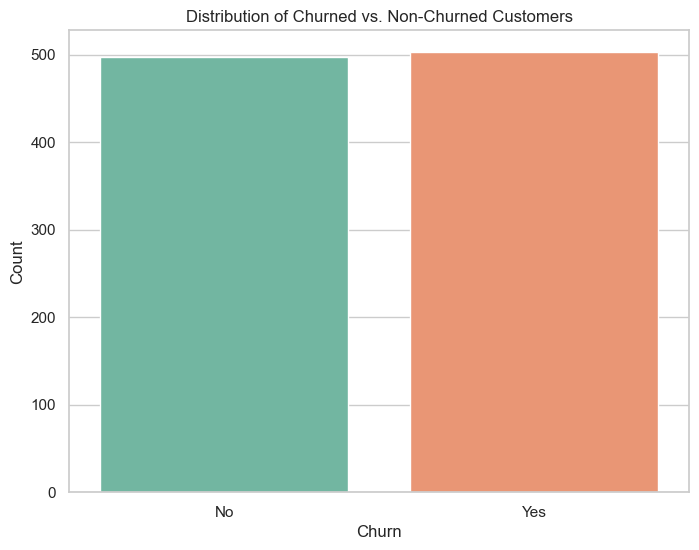

In [10]:
# Visualizing the distribution of churn vs. non-churn customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [11]:
# Plotting the distribution of numerical features
numerical_columns = ['Age', 'AccountTenure', 'TransactionFrequency', 'TotalServicesUsed', 'FeedbackScore', 'AverageBalance', 'EstimatedSalary']

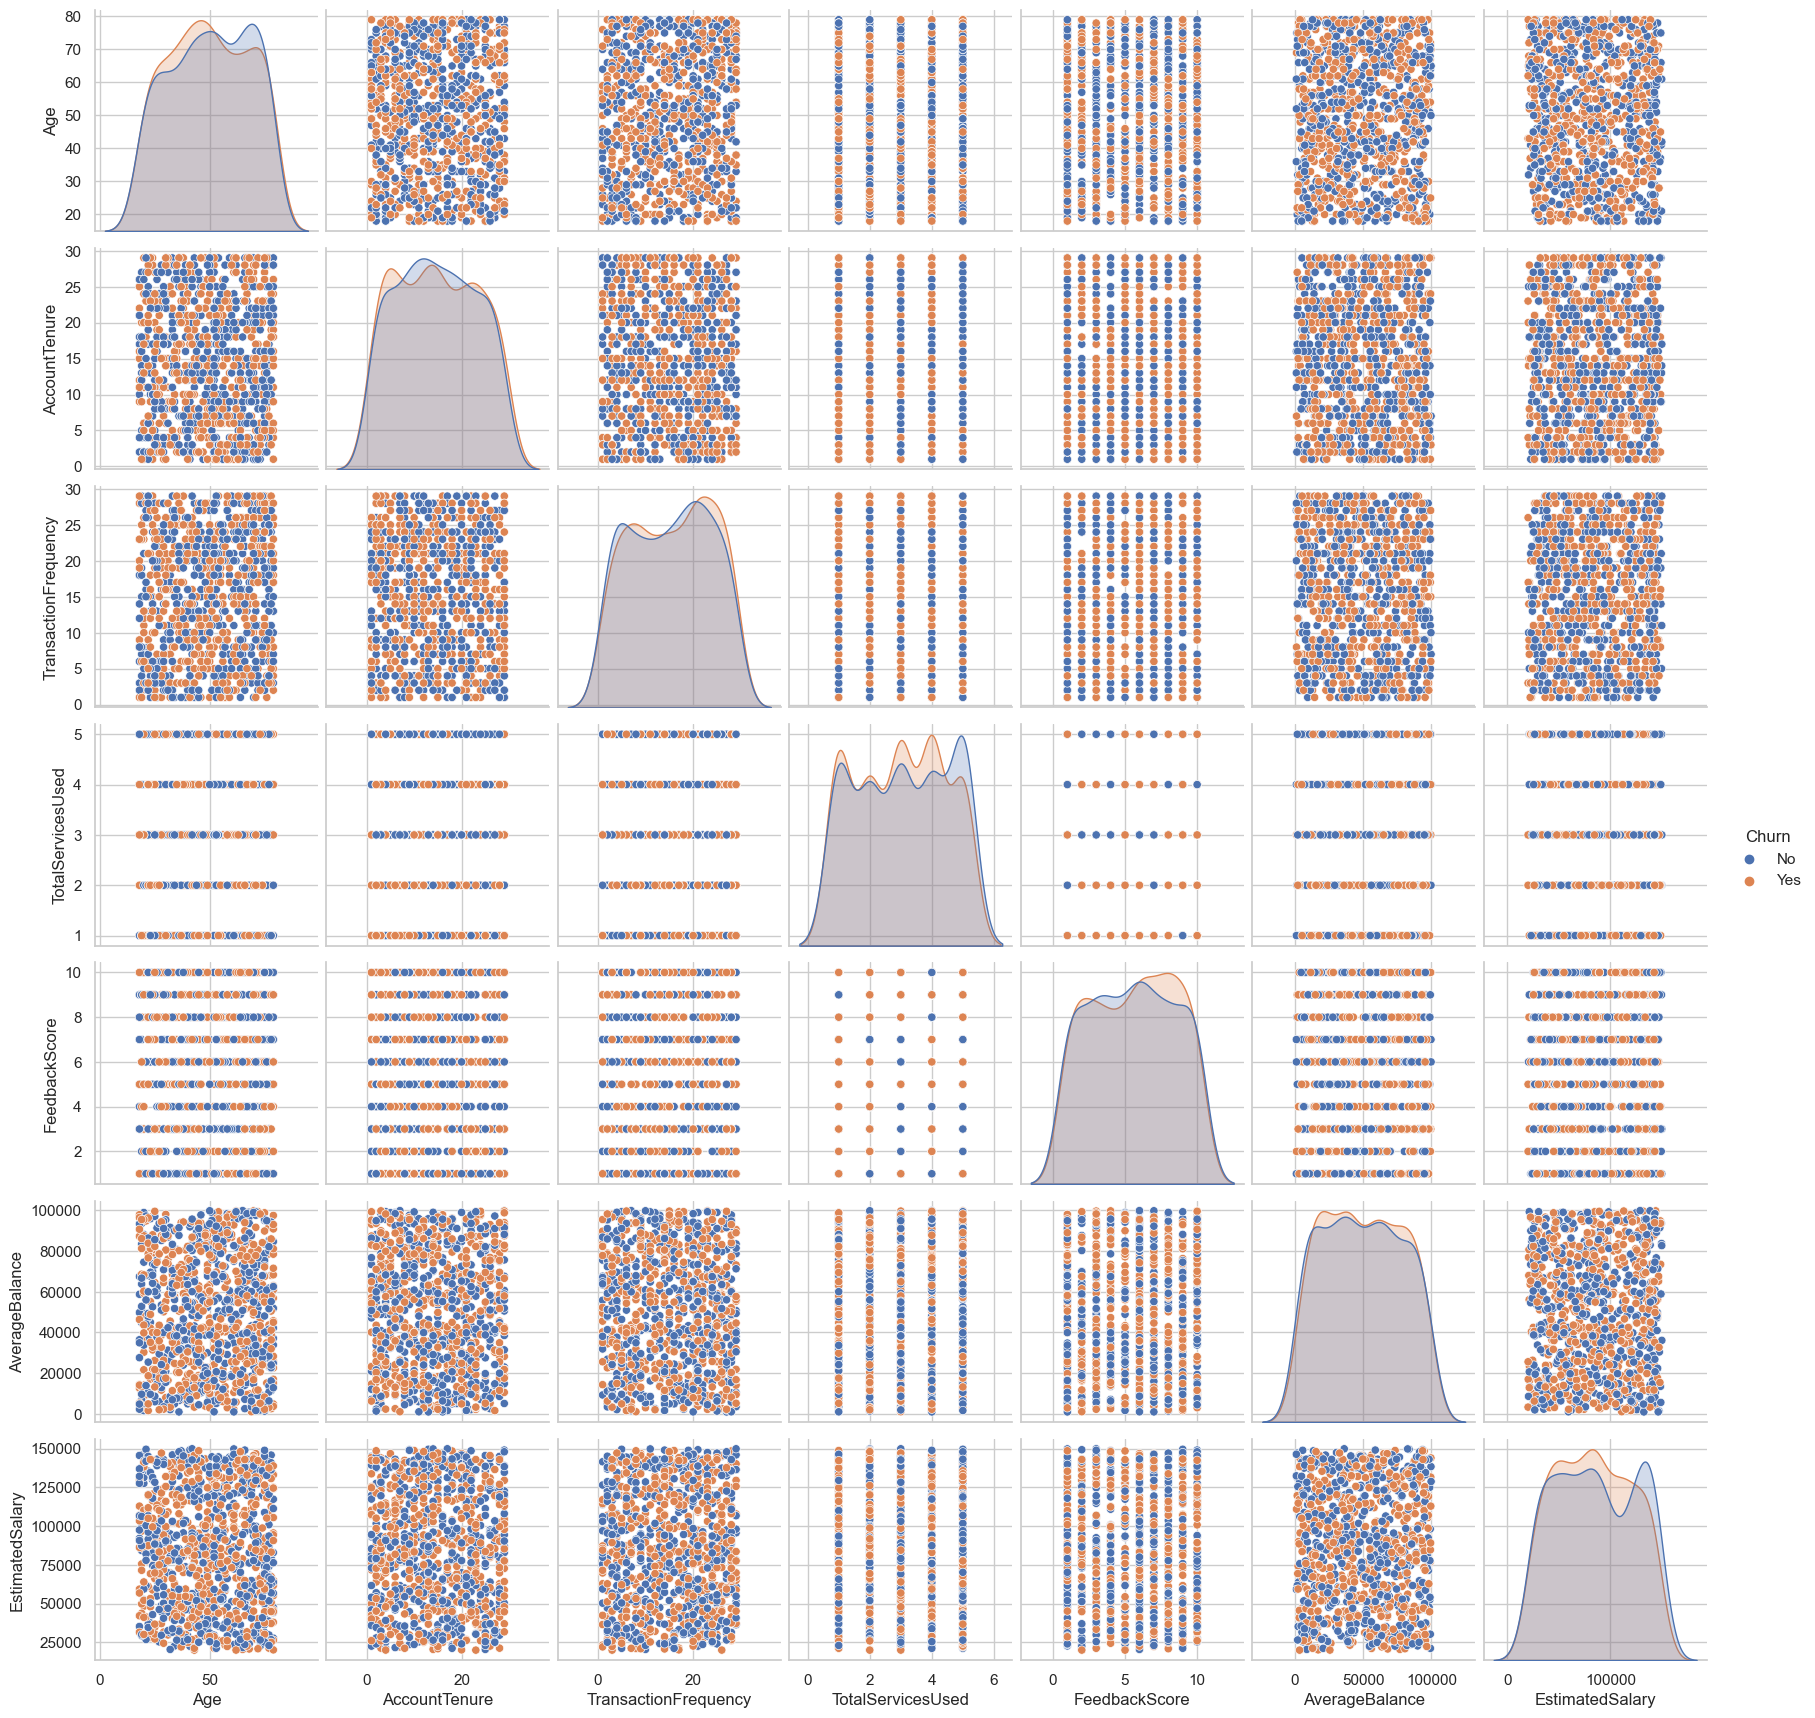

In [12]:
# Pairplot for numerical data with hue set to Churn
sns.pairplot(df[numerical_columns + ['Churn']], hue='Churn')
plt.show()

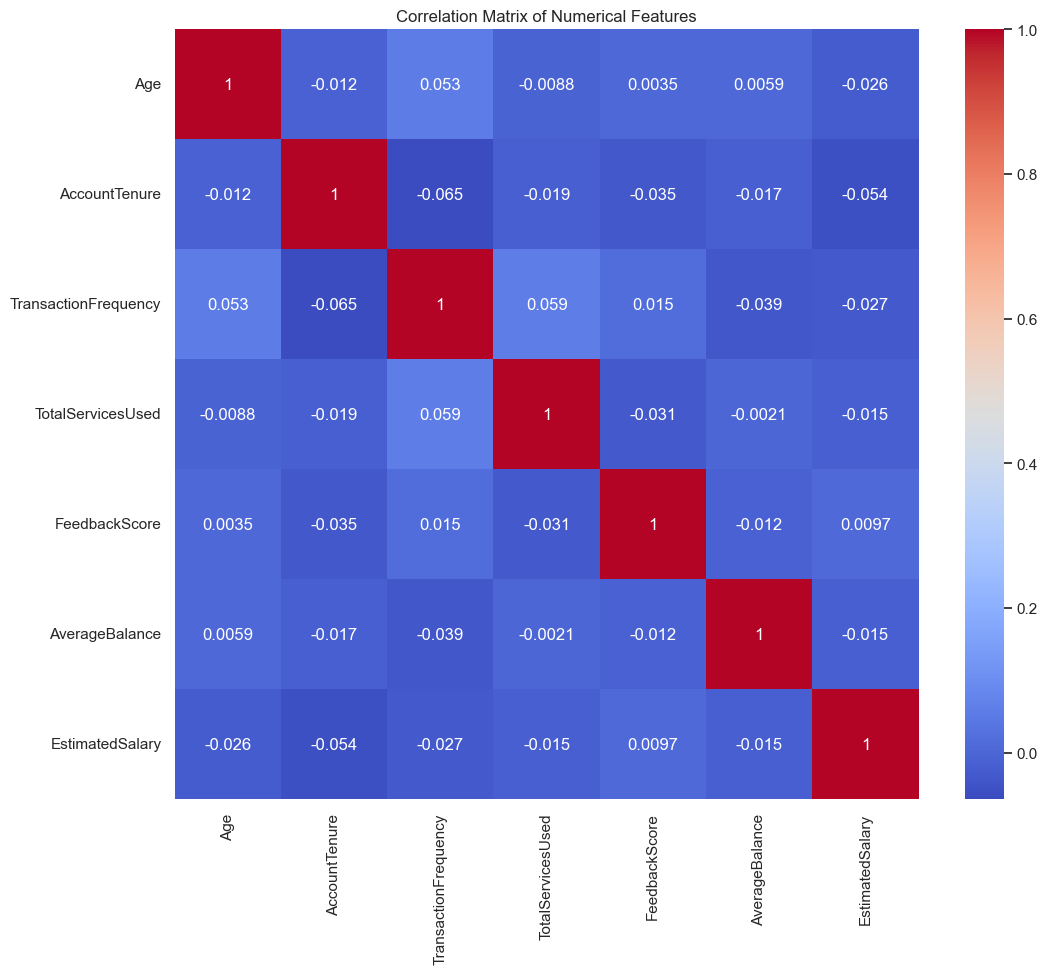

In [13]:
# Checking correlations between numerical variables
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

 2.3. Feature Analysis Based on Customer Demographics

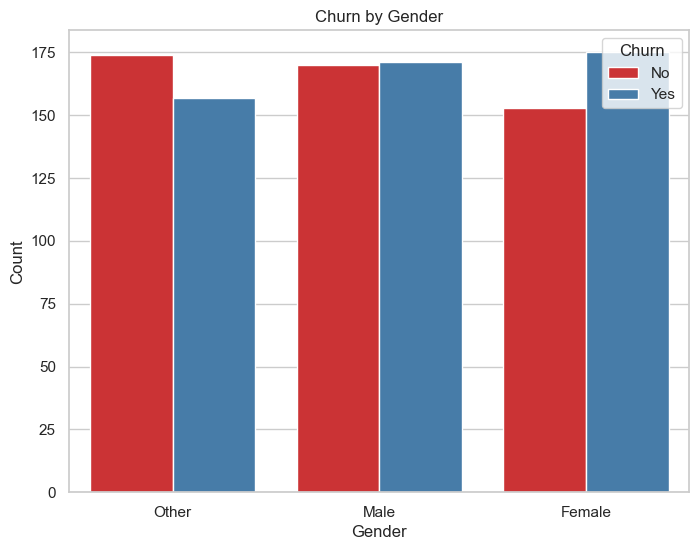

In [14]:
# Visualizing churn based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

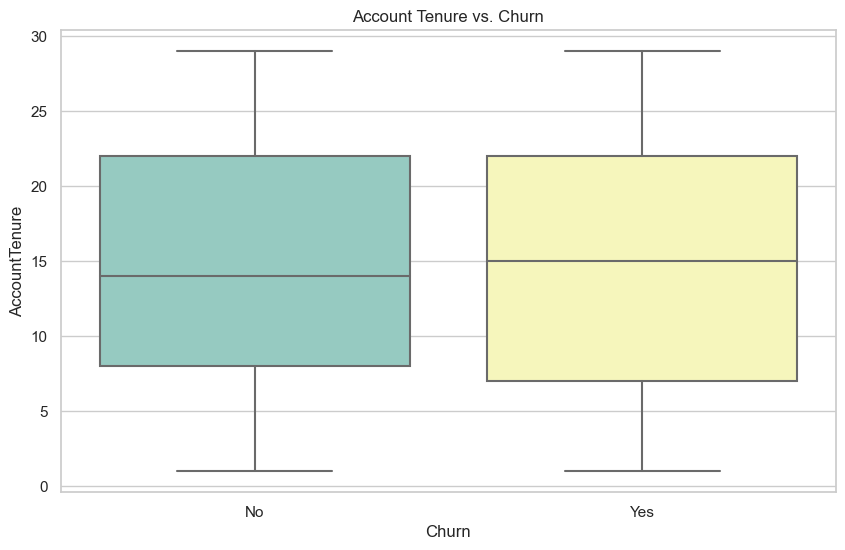

In [15]:
# Visualizing churn based on account tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='AccountTenure', data=df, palette='Set3')
plt.title('Account Tenure vs. Churn')
plt.show()

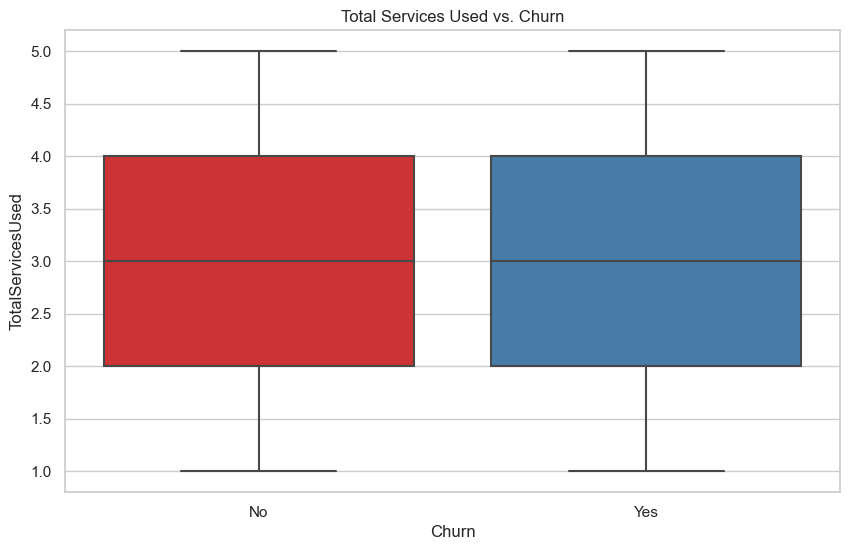

In [16]:
# Visualizing churn based on services used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalServicesUsed', data=df, palette='Set1')
plt.title('Total Services Used vs. Churn')
plt.show()

# Step 3: Preprocessing the Data

3.1. Encoding Categorical Variables

In [17]:
# Encode categorical columns: Gender, IsActiveMember, Geography, HasCrCard, Churn
encoder = LabelEncoder()

for column in ['Gender', 'IsActiveMember', 'Geography', 'HasCrCard', 'Churn']:
    df[column] = encoder.fit_transform(df[column])

In [18]:
# Display the first few rows after encoding
print("\nData after Encoding Categorical Columns:")
print(df.head())


Data after Encoding Categorical Columns:
   CustomerID  Age  Gender  AccountTenure  TransactionFrequency  \
0           1   56       2             11                    13   
1           2   69       1             13                    14   
2           3   46       0             26                    20   
3           4   32       2             25                    18   
4           5   60       1             19                    29   

   TotalServicesUsed  FeedbackScore  AverageBalance  IsActiveMember  \
0                  4              9        40917.57               1   
1                  4              9        83530.76               1   
2                  1              8        81652.43               1   
3                  3             10        61571.27               0   
4                  2             10        37972.34               0   

   NumOfProducts  HasCrCard  EstimatedSalary  Geography  Churn  
0              1          0        142852.22          1      0 

3.2. Splitting the Dataset into Training and Testing Sets

In [19]:
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

In [20]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Building Predictive Models

4.1. Logistic Regression Model

In [22]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       146
           1       0.49      0.46      0.47       154

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

Accuracy Score: 0.4766666666666667


4.2. Decision Tree Model

In [24]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [25]:
# Predictions and evaluation
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy Score:", accuracy_score(y_test, y_pred_tree))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42       146
           1       0.50      0.59      0.54       154

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300

Accuracy Score: 0.49


# Step 5: Visualizations of Churn Trends and Key Factors

5.1. Feature Importance for Decision Tree

In [26]:
# Plotting feature importance from the Decision Tree model
importances = tree_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

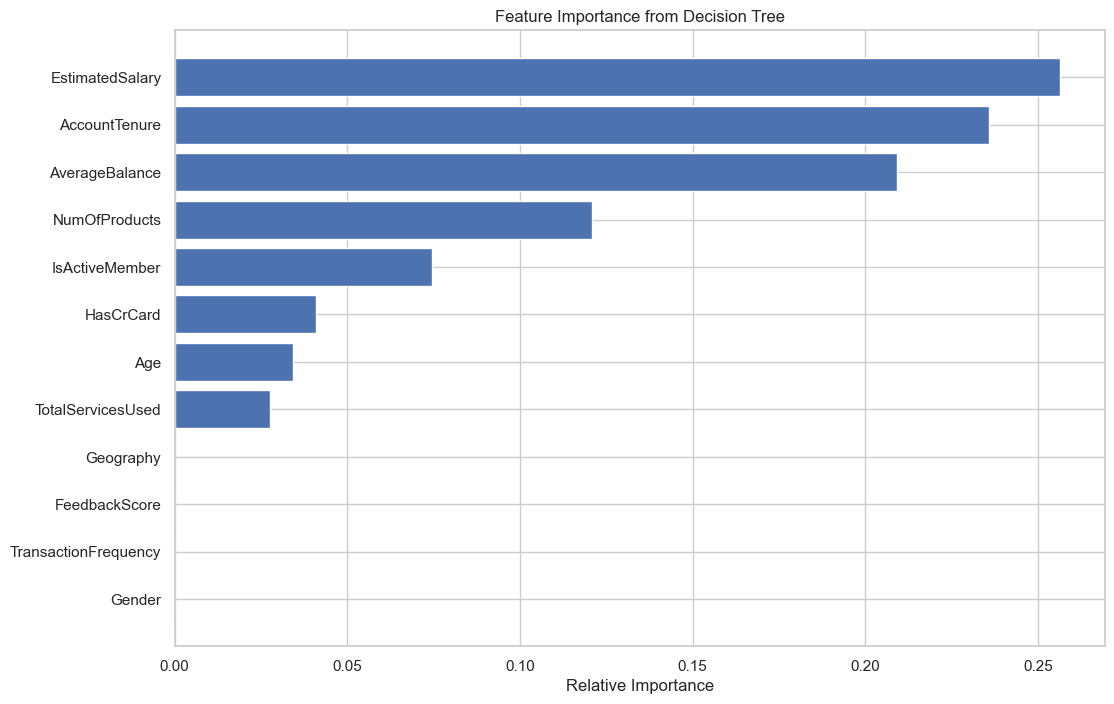

In [27]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importance from Decision Tree')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis() 
plt.show()